<h1>Importação e Visualização de Dados Brutos Corrigidos</h1>

Visualização dos dados brutos corrigidos na etapa anterior.

<h4>Importação de Pacotes</h4>

In [1]:
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook
pd.set_option("float_format", '{:0.10f}'.format)
pd.set_option('display.max_columns', 30)
%run "2 - Processed Data Visualization.py"

<h4>Funções Utilitárias</h4>

In [2]:
# Plot de Dados
def plotData(data, typeAxis, title, raw=False, mean=False, std=False):
    
    plt.figure(figsize=(16,6)) 
    plt.title(title)
    
    below_suspension = data[typeAxis + '_below_suspension']
    above_suspension = data[typeAxis + '_above_suspension']
    dashboard = data[typeAxis + '_dashboard']
    speed = data['speed'] # / 9.80665 # In G/s
    
    if raw:
        below_suspension.plot()
        above_suspension.plot()
        dashboard.plot()
        speed.plot()
    
    if mean:
        below_suspension.rolling(5).mean().plot()
        above_suspension.rolling(5).mean().plot()
        dashboard.rolling(5).mean().plot()
        speed.plot()
        
    if std:
        below_suspension.rolling(5).std().plot()
        above_suspension.rolling(5).std().plot()
        dashboard.rolling(5).std().plot()
        speed.plot()
    
    plt.legend(loc='upper center')

<h4>Importação dos Dados</h4>

In [3]:
folder = os.path.join(workspace['settings']['folder'], workspace['datasets']['palio-3']['folder']) # Seleção do Dataset
gps = pd.read_csv(os.path.join(folder, 'dataset_gps.csv'), float_precision="high")
data_esquerda = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_left.csv'), float_precision="high")
data_direita = pd.read_csv(os.path.join(folder, 'dataset_gps_mpu_right.csv'), float_precision="high")

<h4>Visualização de Dados</h4>

In [4]:
gps.describe()

,timestamp,latitude,longitude,elevation,accuracy,bearing,speed_meters_per_second,satellites,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation,distance_meters,elapsed_time_seconds
count,1014.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,999.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,1014.0000000000,0.0000000000,0.0000000000,0.0000000000,1014.0000000000,0.0000000000,1014.0000000000,1014.0000000000
mean,1577399386.5181796551,-27.6996802411,-51.1136753712,938.9426493261,4.3806706114,209.0205083810,10.2671825258,20.0433925049,0.8223865878,1.2480276134,1.5103550296,3.6000000000,nan,nan,nan,83.4506903353,nan,10.6164100213,1.0393560158
std,304.2991635200,0.0119378248,0.0102726499,35.7765351146,1.1139699575,104.1766868883,8.0904605400,1.2762894801,0.0602874364,0.1094320581,0.1141571637,0.0000000000,nan,nan,nan,0.9638247050,nan,8.5932865791,0.2560933444
min,1577398854.0929999352,-27.7177921860,-51.1288512040,881.7107801621,4.0000000000,0.0417944800,0.0000000000,0.0000000000,0.7000000000,1.0000000000,1.3000000000,3.6000000000,nan,nan,nan,82.0000000000,nan,0.0000000000,0.0000000000
25%,1577399125.2500000000,-27.7130751538,-51.1234042393,904.1164122174,4.0000000000,127.0635300000,4.3545877500,20.0000000000,0.8000000000,1.2000000000,1.4000000000,3.6000000000,nan,nan,nan,83.0000000000,nan,4.4996201820,1.0000000000
50%,1577399388.5000000000,-27.6943158368,-51.1129184335,949.5443940378,4.0000000000,222.4177200000,8.0076310000,20.0000000000,0.8000000000,1.2000000000,1.5000000000,3.6000000000,nan,nan,nan,83.0000000000,nan,8.1713230411,1.0000000000
75%,1577399651.7500000000,-27.6890310897,-51.1039698253,976.1678210809,4.0000000000,307.2157350000,19.0852957500,21.0000000000,0.8000000000,1.3000000000,1.5000000000,3.6000000000,nan,nan,nan,84.0000000000,nan,19.1725810015,1.0000000000
max,1577399908.0000000000,-27.6858812892,-51.0988452291,1010.7376196344,12.0000000000,359.4611200000,25.5521180000,22.0000000000,1.3000000000,1.8000000000,2.2000000000,3.6000000000,nan,nan,nan,85.0000000000,nan,49.1134991643,6.0000000000


In [5]:
data_esquerda.describe()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,gyro_x_above_suspension,gyro_y_above_suspension,...,gyro_y_below_suspension,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed
count,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,...,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000
mean,1577399465.1699998379,0.4589799365,-0.2037149127,9.8660128518,0.5587892905,-0.2312352743,9.6683333247,0.4418794620,-0.2527830457,9.8089312144,-0.0032203384,0.0230010447,-0.1745309948,-0.1153203962,0.0375144883,...,-0.1715744763,-0.1298981743,-11.3157659162,-7.4835734157,-0.9307782433,-46.4175464829,-27.6201833973,3.2369359083,29.9200186769,34.3069667221,32.6934914993,1577399464.5129158497,-27.6971265247,-51.1157791472,11.6850853065
std,264.2979628500,1.2609311055,1.9453367936,2.3063800282,2.2687980866,2.3559620179,3.2467972843,2.3382838168,6.7418173089,3.9360275673,4.8786014004,4.7202433077,4.5847066981,4.9212631751,6.3250240745,...,23.2941854899,8.1651948376,13.1983943854,8.7839749159,1.8378560560,44.8436372987,35.1790458221,6.9711152115,0.6503390255,2.5035553763,1.9909018427,264.1163733966,0.0104912382,0.0092667120,7.5878129268
min,1577399007.4000000954,-7.8447214496,-12.8598556671,-8.0362575824,-13.8200911195,-18.1787644394,-14.9797606505,-17.3001021627,-65.1893798075,-41.2908578695,-37.7117156982,-57.1220397949,-37.8700256348,-124.2078455483,-202.9644105493,...,-233.9731852214,-61.6197131929,-34.5260858417,-25.4840898877,-13.6608440171,-178.0376942673,-308.3244607245,-23.8987717678,0.0000000000,0.0000000000,0.0000000000,1577399007.0000000000,-27.7177921860,-51.1288512040,0.0017626049
25%,1577399236.2849998474,-0.1641225238,-0.9989806427,8.8620177350,-0.4556574525,-1.2900659287,8.1961114198,-0.4832297017,-2.1332906840,8.1978889964,-1.7772674561,-1.7173767090,-1.7524719238,-2.4121912514,-3.0132386743,...,-8.7534586589,-3.2395862398,-26.9339622534,-14.7638454331,-2.2768073362,-102.3462910204,-57.6265364265,-2.4902297176,29.3385748944,33.0286338994,30.8721059095,1577399236.0000000000,-27.7049493903,-51.1248263360,6.3315387000
50%,1577399465.1700000763,0.4080916730,-0.1274912384,9.8532172223,0.4756869933,-0.1576085434,9.7068526674,0.4026249125,-0.1269496928,9.8169678691,0.0080108643,0.0373840332,0.0175476074,-0.1233728921,0.0385191382,...,-0.6663004557,0.0257946196,-6.6882993515,-7.2408668685,-0.8131454772,-32.0230724009,-33.8862026862,7.0246778602,29.8657261808,33.8912450954,32.4535597688,1577399465.0000000000,-27.6935414194,-51.1161400903,8.5507840000
75%,1577399694.0549998283,1.1598709943,0.6769605194,10.8827239362,1.6434588530,0.9018256912,11.1218258485,1.4830084117,1.7860174337,11.4354481913,1.9001007080,1.8989562988,1.6807556152,2.0738927329,3.0597593726,...,7.1156819661,3.1385875884,1.2653539314,-0.2821116962,0.3252581909,-6.2557861891,-0.1749287749,8.1397060920,30.3449546231,34.9455476683,34.5621649145,1577399694.0000000000,-27.6887845045,-51.1093010635,19.6413940000
max,1577399922.9400000572,8.5627425275,12.7533136932,31.5279248517,17.0004668517,17.7390488662,33.7781561586,17.6504536723,61.6721835592,57.9871081706,40.9320831299,53.7788391113,24.2179870605,216.4903966392,124.8554136695,...,372.8688557943,61.7933727446,9.9420666036,10.2500582943,7.643567

In [6]:
data_direita.describe()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,gyro_x_above_suspension,gyro_y_above_suspension,...,gyro_y_below_suspension,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed
count,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,...,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000,91555.0000000000
mean,1577399465.1699998379,0.4514419229,-0.2462867158,9.8867862216,0.5106912133,-0.2633992361,9.8155744342,0.4616228615,-0.3559506128,9.9060797427,0.0291211365,0.0257054639,-0.1778285455,-0.0339274995,0.1357813483,...,-0.1511114629,-0.2417950449,-11.2463412938,-8.3093929280,-0.6712136321,-2.9630938288,-8.3446374749,-11.5575912131,27.8811814336,33.8803500437,36.6807835972,1577399464.5129158497,-27.6971265247,-51.1157791472,11.6850853065
std,264.2979628500,1.2847803946,1.9677068537,2.1620226786,1.9355942382,2.1063103781,2.8700504970,3.0834465240,6.3825075991,3.6343533051,6.9747089729,6.5949321438,4.6412407983,5.2716511056,7.4939998123,...,20.3325750083,8.5408622373,12.8968515737,9.6496834549,2.0794076309,9.3864619254,21.6403810945,15.3714997449,0.9149676592,2.0411506238,2.2550256717,264.1163733966,0.0104912382,0.0092667120,7.5878129268
min,1577399007.4000000954,-8.6504257836,-17.3276549468,-4.8046955706,-15.7043278261,-16.5232615842,-11.9023939849,-29.6395158108,-66.3124953572,-27.4471278320,-55.3717264315,-47.2073438691,-38.5049959508,-131.7222409132,-225.8040265339,...,-309.6067847275,-91.0090004526,-35.1709334936,-27.9146145833,-12.2489544021,-16.4210858252,-50.9566136988,-69.5202213652,26.4632042412,30.5366459999,27.6837391799,1577399007.0000000000,-27.7177921860,-51.1288512040,0.0017626049
25%,1577399236.2849998474,-0.1725577050,-1.0614488677,8.9212625470,-0.4173502260,-1.2338897824,8.5129635712,-0.6409453030,-2.1071894367,8.4682912720,-2.5763162752,-2.9568555878,-1.8839022008,-2.2056393507,-3.1782941120,...,-6.6587866806,-3.5151039682,-26.3561631944,-16.6669676816,-2.1792618261,-9.8468395587,-29.6941417957,-29.4016404269,27.0382783718,32.9567496331,34.8017791356,1577399236.0000000000,-27.7049493903,-51.1248263360,6.3315387000
50%,1577399465.1700000763,0.4092332984,-0.1660174468,9.8885200177,0.4565333800,-0.2139598752,9.7854817536,0.3765904026,-0.2516831501,9.8712934448,-0.0128397127,0.0033494903,0.0081876429,-0.0694088820,0.1481219036,...,0.1771508194,-0.0818764291,-6.9636685363,-8.2823581731,-0.6763226357,-3.2725932921,-2.5661604021,-3.7375482090,27.6133525025,33.4599394974,35.9519273969,1577399465.0000000000,-27.6935414194,-51.1161400903,8.5507840000
75%,1577399694.0549998283,1.1610126197,0.6575879243,10.8557774884,1.4980111021,0.7568888980,11.1058839692,1.6981897190,1.5104492717,11.3341506592,2.6269307951,2.9482957793,1.8545011195,2.0363040087,3.6881609661,...,7.3792992569,3.1377280631,1.1459201389,-0.1022513355,0.6763226357,1.8635366036,7.6984812063,-1.3776316832,28.4280408542,34.4663192260,38.5876838290,1577399694.0000000000,-27.6887845045,-51.1093010635,19.6413940000
max,1577399922.9400000572,8.6955652442,11.9270951386,25.4244945905,13.1434079771,13.6077663089,39.0964955781,29.8013288059,67.5305600506,47.6158826172,104.3572774748,49.6249315215,24.2086270960,214.5607180712,153.5905047161,...,207.9713402725,68.0486167349,10.6658720620,10.5318875534,7.138961

In [7]:
gps.head()

,timestamp,latitude,longitude,elevation,accuracy,bearing,speed_meters_per_second,satellites,provider,hdop,vdop,pdop,geoidheight,ageofdgpsdata,dgpsid,activity,battery,annotation,distance_meters,elapsed_time_seconds
0,1577398854.0929999352,-27.7176688693,-51.0988452291,1010.7376196344,8.0000000000,196.8202800000,1.0591824000,0,gps,1.0000000000,1.7000000000,2.0000000000,3.6000000000,nan,nan,nan,85,nan,0.0000000000,0.0000000000
1,1577398855.0920000076,-27.7176899184,-51.0989381528,1001.9054212869,6.0000000000,244.7717900000,1.1281757000,11,gps,0.9000000000,1.5000000000,1.8000000000,3.6000000000,nan,nan,nan,85,nan,9.4560590017,0.9990000725
2,1577398856.0829999447,-27.7177004171,-51.0989531781,998.9896134512,6.0000000000,270.3939800000,0.2207288100,11,gps,0.9000000000,1.6000000000,1.8000000000,3.6000000000,nan,nan,nan,85,nan,1.8839061173,0.9909999371
3,1577398857.0829999447,-27.7177001244,-51.0989532787,994.7213603738,8.0000000000,nan,0.0000000000,14,gps,0.8000000000,1.3000000000,1.6000000000,3.6000000000,nan,nan,nan,85,nan,0.0339211000,1.0000000000
4,1577398858.0829999447,-27.7177001273,-51.0989534652,993.1997883760,8.0000000000,nan,0.0000000000,14,gps,0.8000000000,1.3000000000,1.5000000000,3.6000000000,nan,nan,nan,85,nan,0.0183958214,1.0000000000


In [8]:
data_esquerda.head()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,gyro_x_above_suspension,gyro_y_above_suspension,...,gyro_y_below_suspension,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed
0,1577399007.4000000954,-0.0252588275,0.0592564911,9.8268810040,0.0734611144,0.0542783035,9.8624757753,0.0255381510,0.0071256002,9.7666896342,0.0385284424,0.2510070801,-0.0434875488,-0.1386316811,0.0537779273,...,-0.2390543620,-0.0352405366,0.9038242367,0.0940372321,-0.8131454772,0.7228538266,3.1487179487,-5.8353144130,31.0158744421,42.1100128793,36.7186929044,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
1,1577399007.4100000858,-0.0156820209,0.0568622894,9.8388520123,0.0183944762,0.0219565811,9.8481105653,0.0195526469,-0.0168164164,9.7810548442,-0.0530242920,-0.0846862793,0.0480651855,-0.1233728921,-0.0225160180,...,-0.0864664714,-0.2488635835,-0.3615296947,-0.8463350885,-0.6505163818,-4.6453308009,-3.9733821734,-5.6123087666,31.0637972864,42.0860514572,36.6707700602,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
2,1577399007.4200000763,-0.0420182391,0.0353144745,9.8101215924,0.1045857359,0.0794174209,9.8002265321,0.0411004618,0.0095198018,9.8049968608,0.0080108643,0.1289367676,0.1396179199,-0.2759607827,-0.0835511743,...,-0.2390543620,-0.1267932710,-1.6268836260,0.4701861603,0.1626290954,3.4069461403,-4.4481888482,-6.1326552748,30.9200287537,41.9902057687,36.8624614371,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
3,1577399007.4300000668,-0.0096965167,0.0568622894,9.7993476849,0.0543075011,0.0171681778,9.8086062379,0.0387062602,-0.0108309123,9.7798577433,0.0843048096,-0.0541687012,-0.0587463379,-0.0623377358,0.0690367164,...,-0.0254313151,-0.0047229585,0.0000000000,-1.5986329450,-0.6505163818,2.3333092148,-3.9733821734,-5.8353144130,30.8721059095,42.1579357235,36.7666157486,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
4,1577399007.4400000572,-0.0444124408,0.0520738861,9.8508230206,0.0734611144,0.0267449844,9.7355830873,0.0051874369,0.0167024068,9.7523244242,-0.0225067139,0.2510070801,-0.0434875488,0.0902501548,-0.1445863305,...,-0.2390543620,0.0257946196,-0.9038242367,-1.0344095526,1.7889200499,3.9437646030,3.6235246235,-6.9503426448,31.1117201306,42.1339743014,36.8145385929,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062


In [9]:
data_direita.head()

,timestamp,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,acc_x_above_suspension,acc_y_above_suspension,acc_z_above_suspension,acc_x_below_suspension,acc_y_below_suspension,acc_z_below_suspension,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,gyro_x_above_suspension,gyro_y_above_suspension,...,gyro_y_below_suspension,gyro_z_below_suspension,mag_x_dashboard,mag_y_dashboard,mag_z_dashboard,mag_x_above_suspension,mag_y_above_suspension,mag_z_above_suspension,temp_dashboard,temp_above_suspension,temp_below_suspension,timestamp_gps,latitude,longitude,speed
0,1577399007.4000000954,-0.0720012353,0.0087592744,9.7472621198,-0.0270953554,-0.0367889523,9.7124586030,-0.0088760647,0.0428036541,9.7707369751,-0.0433572909,0.0033494903,0.0387052210,0.3273196337,0.1481219036,...,-0.2195776963,-0.1581703744,0.4407385150,-0.1022513355,0.0751469595,-1.6290317255,1.8329717158,0.9822848426,29.5302662713,40.2170605325,39.9774463114,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
1,1577399007.4100000858,-0.0432708154,0.0614317109,9.7544447248,-0.0127301454,-0.0367889523,9.7579484345,0.0342195652,0.0140732341,9.8593224365,-0.1043924471,0.0033494903,-0.1138826696,0.0526614305,-0.0349835652,...,0.0855980850,-0.0666176401,-0.9696247329,1.5337700321,0.6763226357,-1.6290317255,-1.0997830295,0.9822848426,29.3385748944,40.2649833768,40.1691376883,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
2,1577399007.4200000763,-0.0049635888,0.0566433076,9.8071171613,-0.0247011537,-0.0152411374,9.7459774262,0.0270369602,0.0260442424,9.7755253784,0.1397481779,-0.0271680878,0.0692227992,-0.0999264601,-0.0349835652,...,0.0855980850,-0.0971352182,-0.9696247329,1.5337700321,0.6763226357,-1.4235865297,-3.8492406031,0.8347900597,29.5302662713,40.4087519094,40.0732919999,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
3,1577399007.4300000668,0.0094016212,-0.0032117339,9.8142997663,0.0040292662,-0.0846729855,9.7364006196,0.0294311619,0.0260442424,9.8305920166,0.1092305998,0.1559373809,-0.1138826696,0.0831790087,0.3007097942,...,0.0245629287,0.2995932974,-0.9696247329,1.5337700321,0.6763226357,-3.0671480963,-2.3828632305,1.4247691911,29.6261119597,40.3608290652,40.1691376883,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062
4,1577399007.4400000572,-0.0289056054,0.0135476777,9.7532476239,-0.0294895570,-0.0343947507,9.7723136445,-0.0064818630,-0.0002919758,9.7803137817,0.0481954435,-0.0576856660,0.2065519007,-0.1914791945,-0.1570538777,...,0.0245629287,-0.1886879526,-0.1762954060,0.8180106838,0.6011756762,-3.0671480963,-2.3828632305,-0.9351473346,29.4583820050,40.1691376883,39.9774463114,1577399007.0000000000,-27.7177580925,-51.0989938395,0.0032127062


<h2>Acceleration</h2>

<h6>Acc X Esquerda</h6>

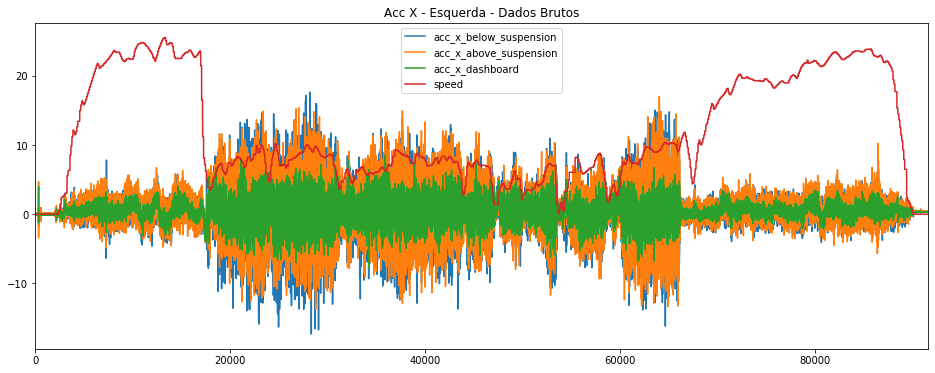

In [10]:
plotData(data_esquerda, "acc_x", "Acc X - Esquerda - Dados Brutos", raw=True)

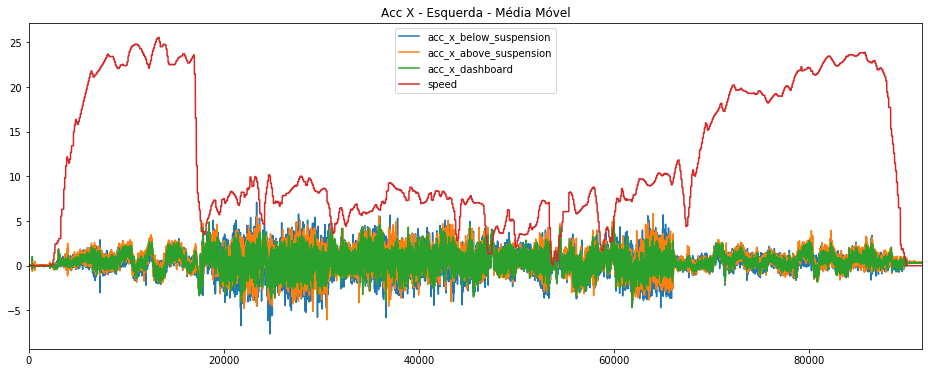

In [11]:
plotData(data_esquerda, "acc_x", "Acc X - Esquerda - Média Móvel", mean=True)

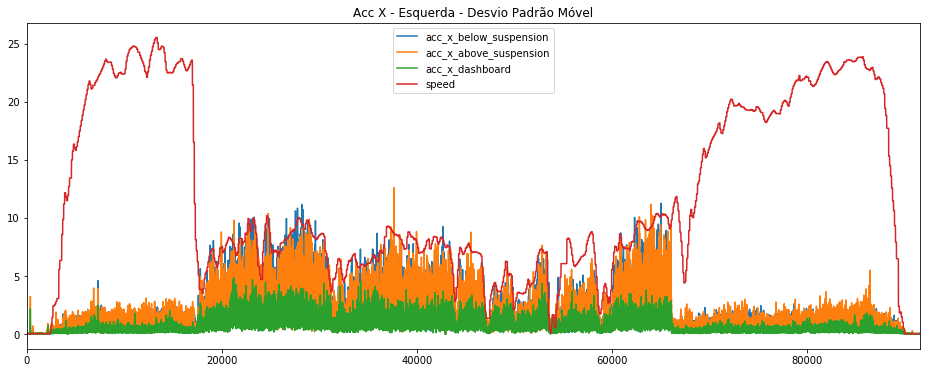

In [12]:
plotData(data_esquerda, "acc_x", "Acc X - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Acc X Direita</h6>

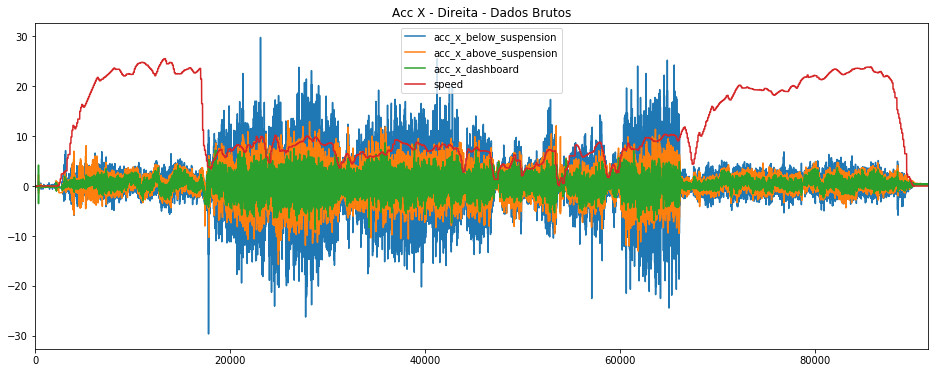

In [13]:
plotData(data_direita, "acc_x", "Acc X - Direita - Dados Brutos", raw=True)

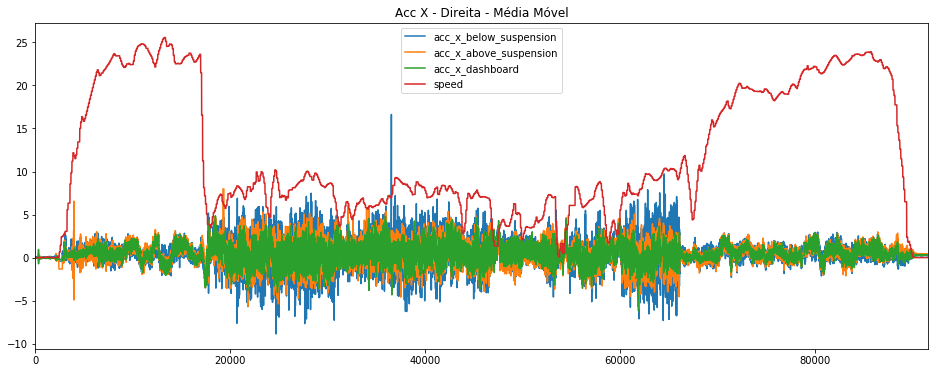

In [14]:
plotData(data_direita, "acc_x", "Acc X - Direita - Média Móvel", mean=True)

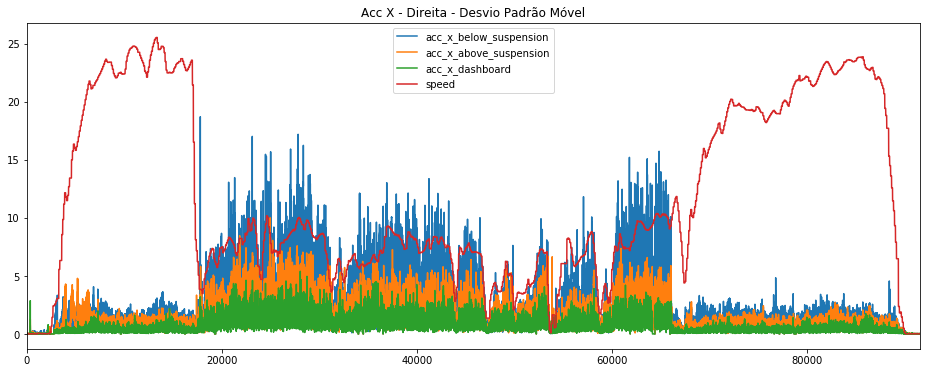

In [15]:
plotData(data_direita, "acc_x", "Acc X - Direita - Desvio Padrão Móvel", std=True)

<h6>Acc Y Esquerda</h6>

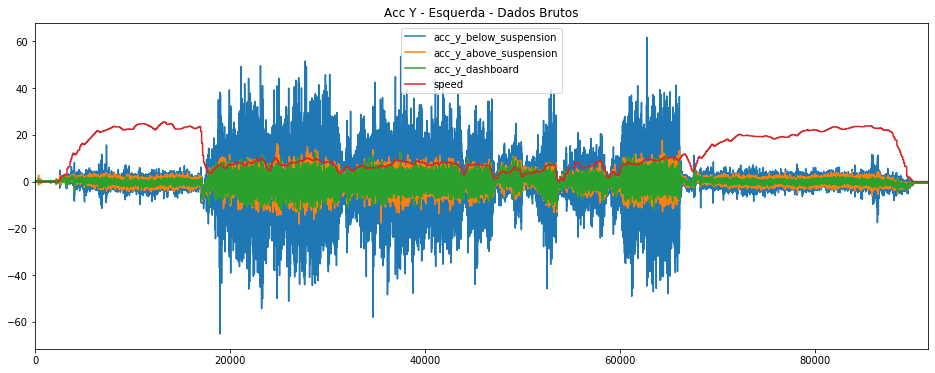

In [16]:
plotData(data_esquerda, "acc_y", "Acc Y - Esquerda - Dados Brutos", raw=True)

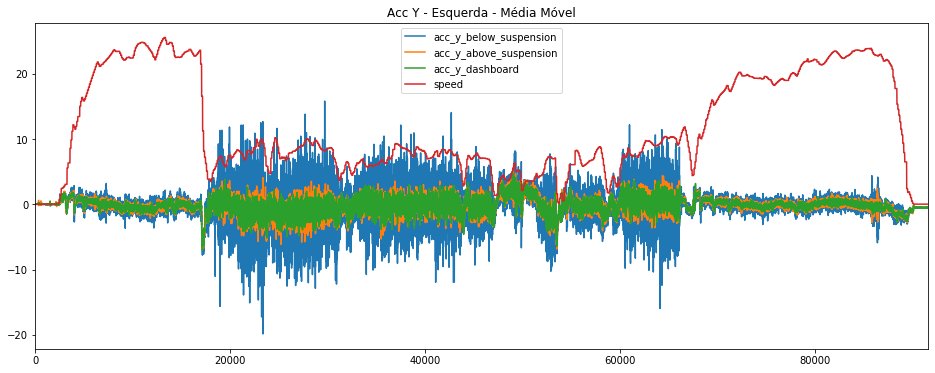

In [17]:
plotData(data_esquerda, "acc_y", "Acc Y - Esquerda - Média Móvel", mean=True)

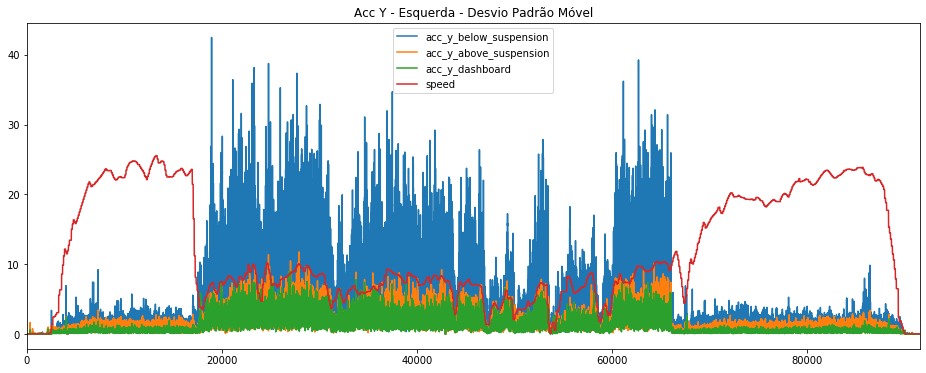

In [18]:
plotData(data_esquerda, "acc_y", "Acc Y - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Acc Y Direita</h6>

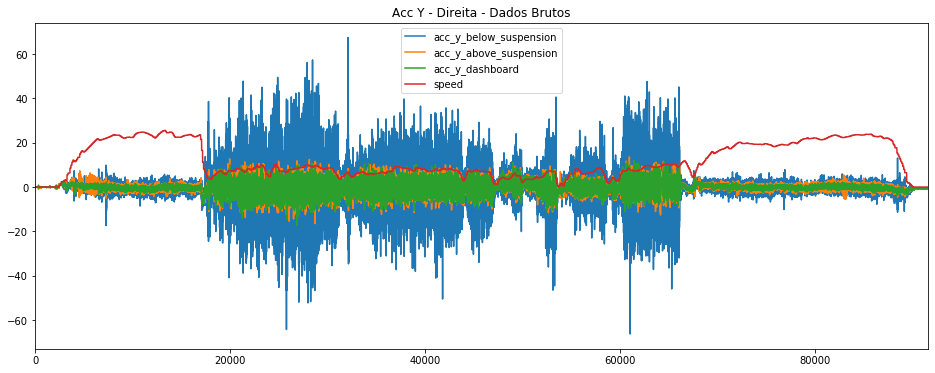

In [19]:
plotData(data_direita, "acc_y", "Acc Y - Direita - Dados Brutos", raw=True)

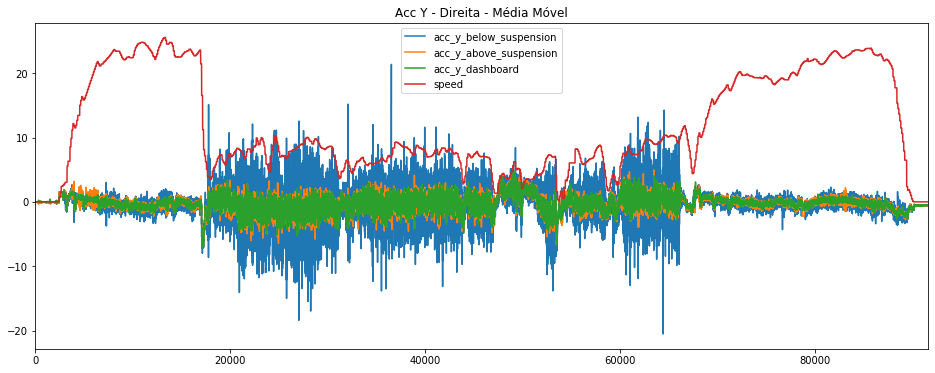

In [20]:
plotData(data_direita, "acc_y", "Acc Y - Direita - Média Móvel", mean=True)

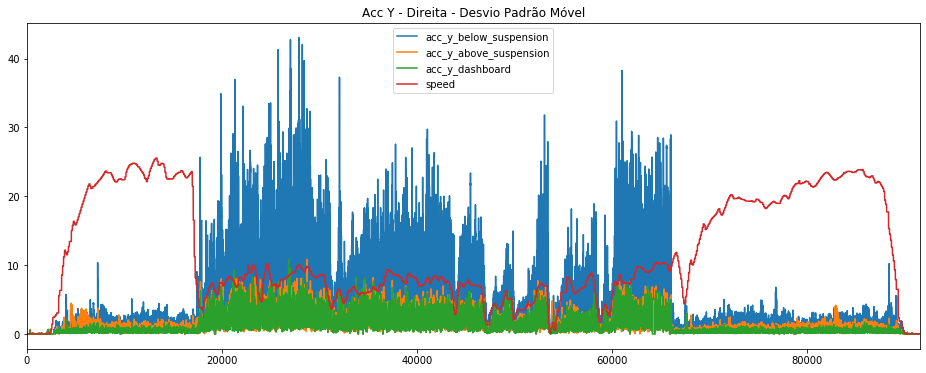

In [21]:
plotData(data_direita, "acc_y", "Acc Y - Direita - Desvio Padrão Móvel", std=True)

<h6>Acc Z Esquerda</h6>

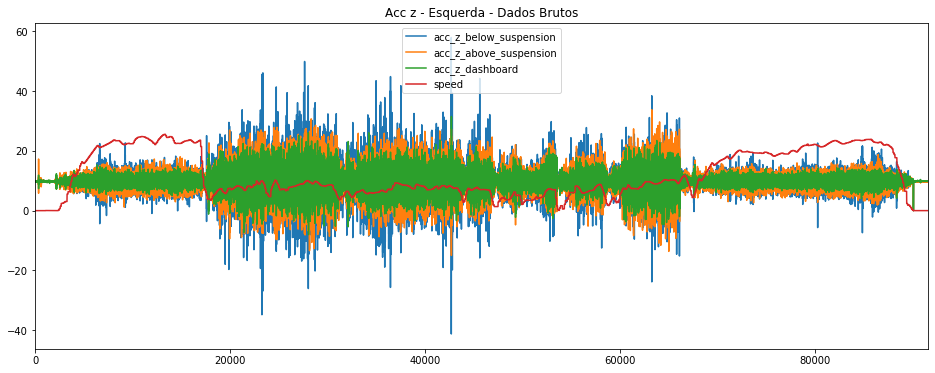

In [22]:
plotData(data_esquerda, "acc_z", "Acc z - Esquerda - Dados Brutos", raw=True)

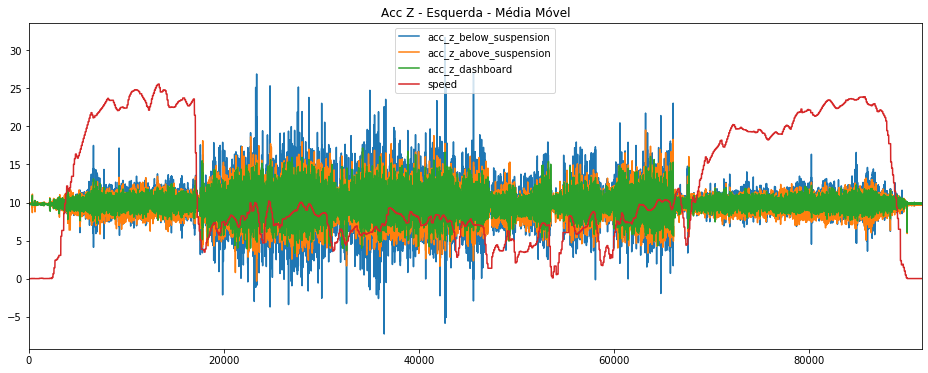

In [23]:
plotData(data_esquerda, "acc_z", "Acc Z - Esquerda - Média Móvel", mean=True)

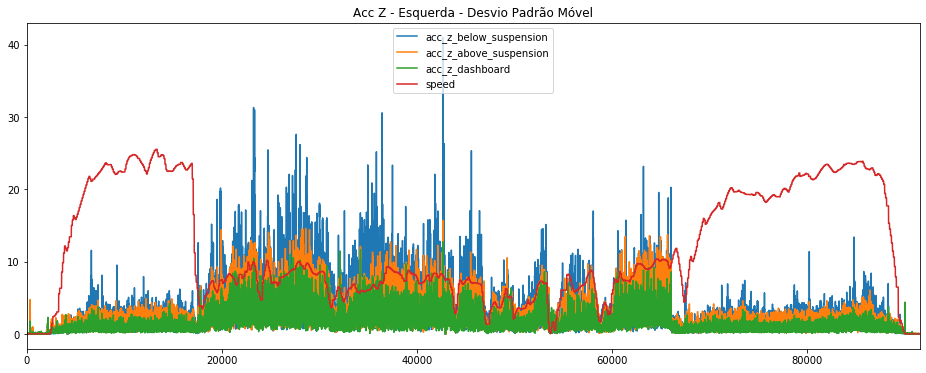

In [24]:
plotData(data_esquerda, "acc_z", "Acc Z - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Acc Z Direita</h6>

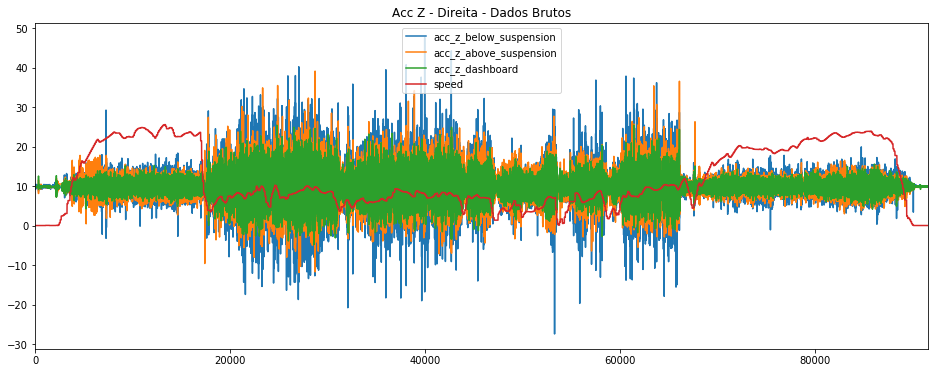

In [25]:
plotData(data_direita, "acc_z", "Acc Z - Direita - Dados Brutos", raw=True)

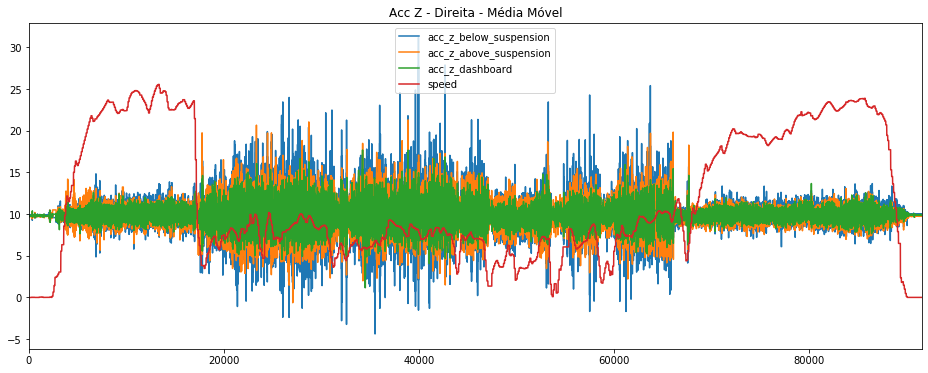

In [26]:
plotData(data_direita, "acc_z", "Acc Z - Direita - Média Móvel", mean=True)

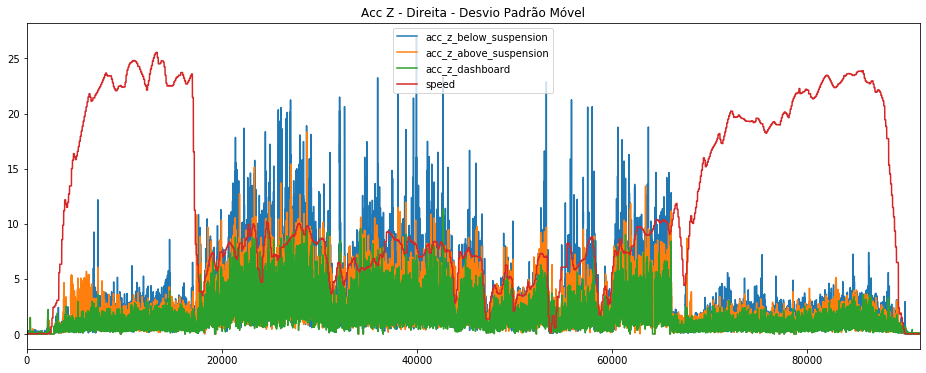

In [27]:
plotData(data_direita, "acc_z", "Acc Z - Direita - Desvio Padrão Móvel", std=True)

<h2>Gyroscope</h2>

<h6>Gyro X Esquerda</h6>

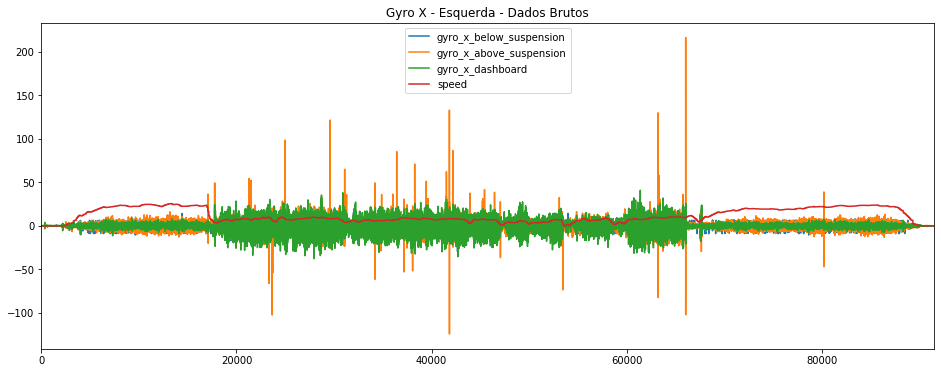

In [28]:
plotData(data_esquerda, "gyro_x", "Gyro X - Esquerda - Dados Brutos", raw=True)

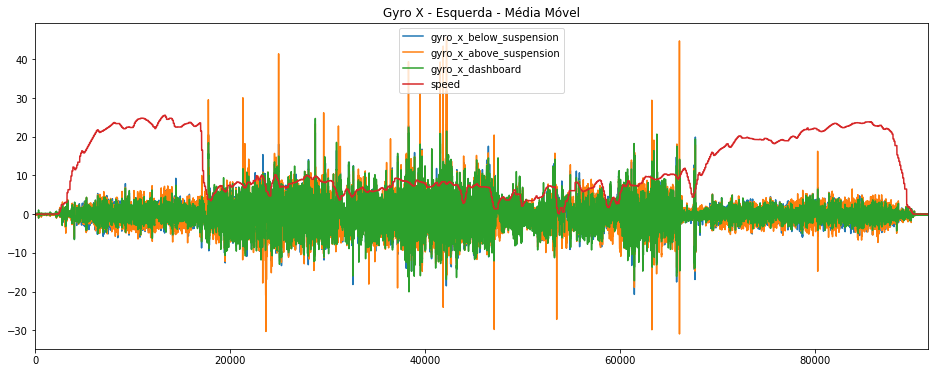

In [29]:
plotData(data_esquerda, "gyro_x", "Gyro X - Esquerda - Média Móvel", mean=True)

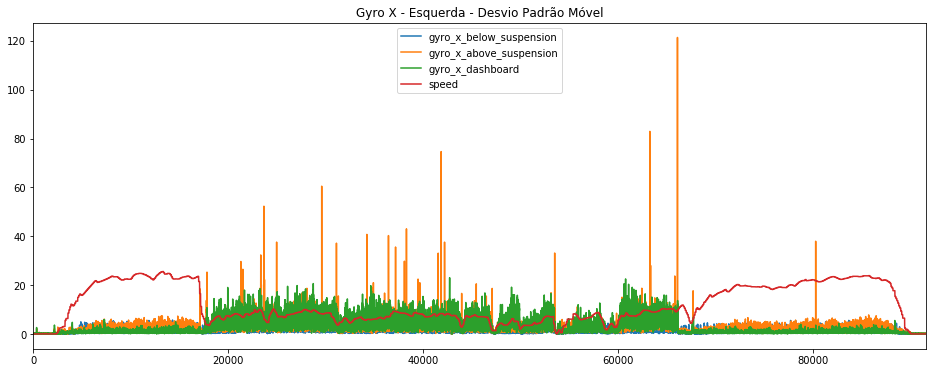

In [30]:
plotData(data_esquerda, "gyro_x", "Gyro X - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Gyro X Direita</h6>

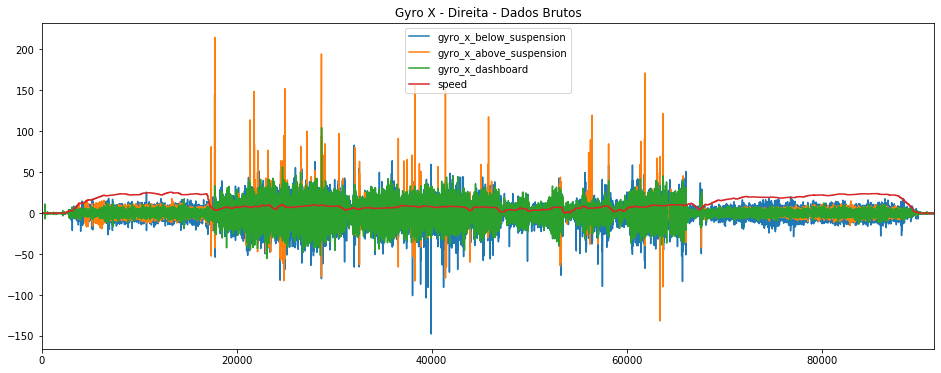

In [31]:
plotData(data_direita, "gyro_x", "Gyro X - Direita - Dados Brutos", raw=True)

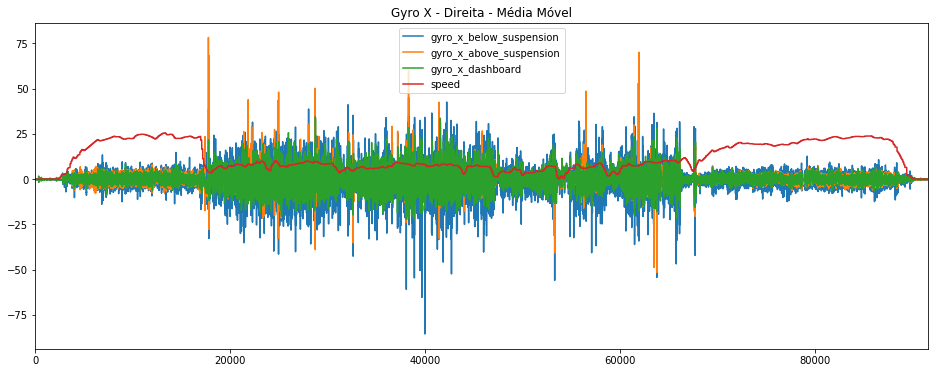

In [32]:
plotData(data_direita, "gyro_x", "Gyro X - Direita - Média Móvel", mean=True)

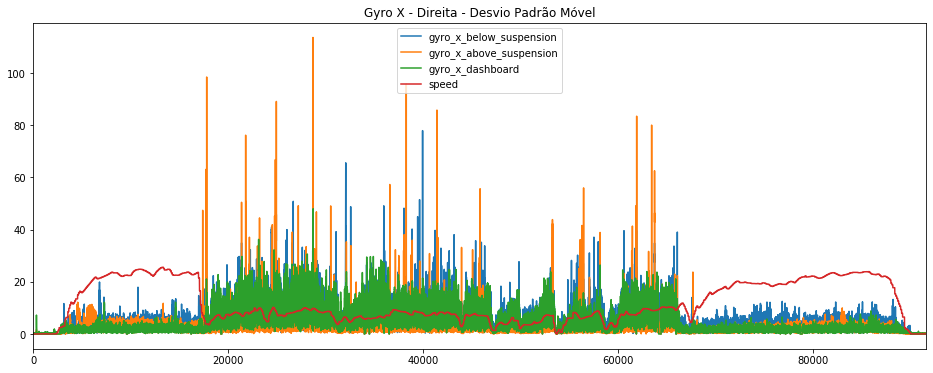

In [33]:
plotData(data_direita, "gyro_x", "Gyro X - Direita - Desvio Padrão Móvel", std=True)

<h6>Gyro Y Esquerda</h6>

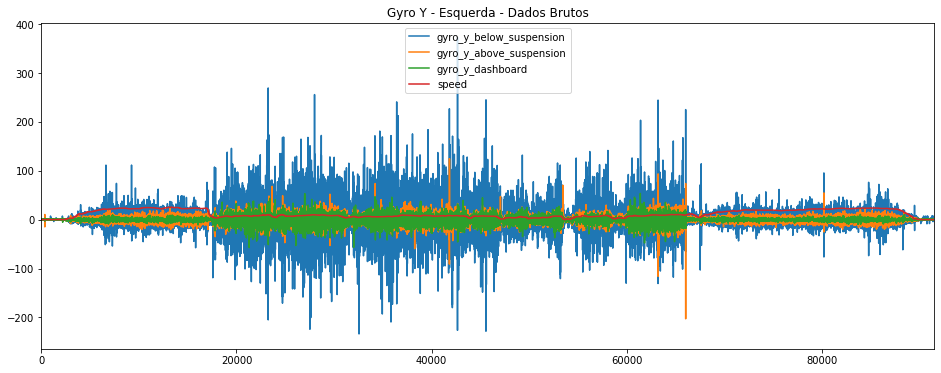

In [34]:
plotData(data_esquerda, "gyro_y", "Gyro Y - Esquerda - Dados Brutos", raw=True)

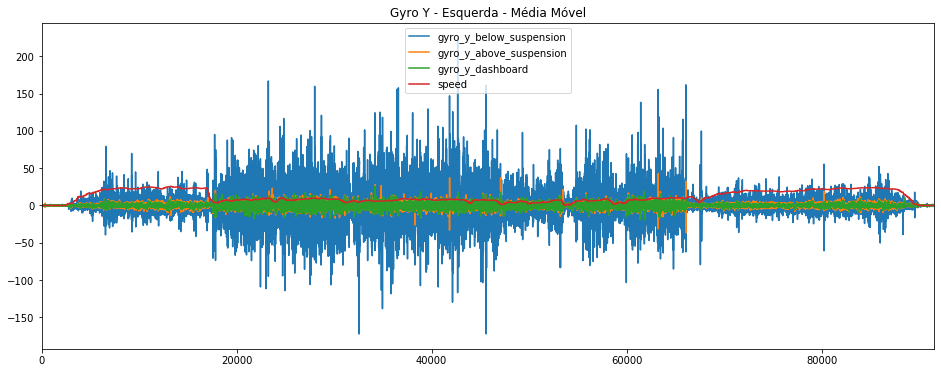

In [35]:
plotData(data_esquerda, "gyro_y", "Gyro Y - Esquerda - Média Móvel", mean=True)

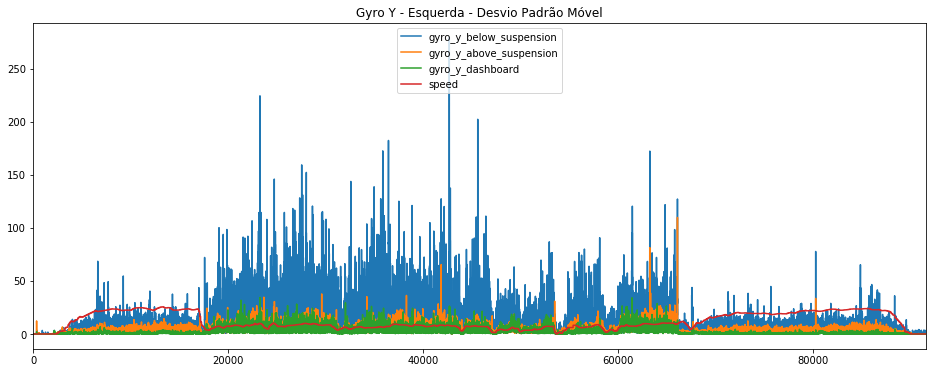

In [36]:
plotData(data_esquerda, "gyro_y", "Gyro Y - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Gyro Y Direita</h6>

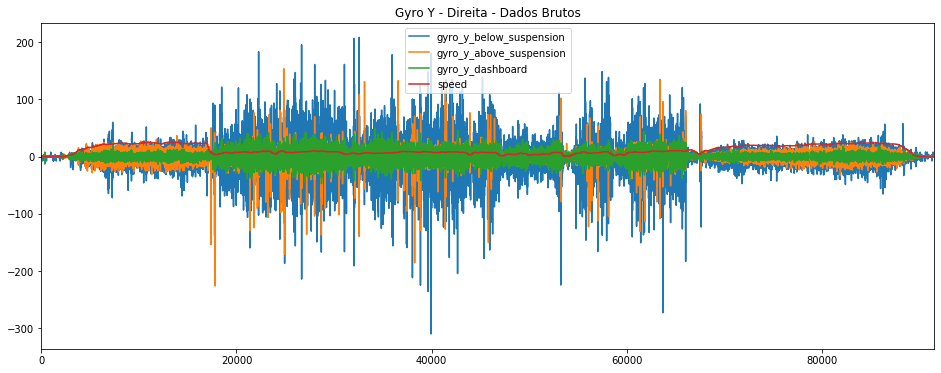

In [37]:
plotData(data_direita, "gyro_y", "Gyro Y - Direita - Dados Brutos", raw=True)

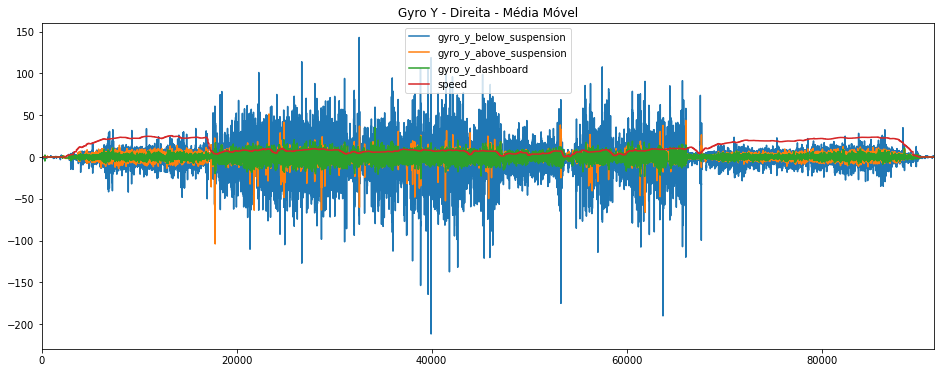

In [38]:
plotData(data_direita, "gyro_y", "Gyro Y - Direita - Média Móvel", mean=True)

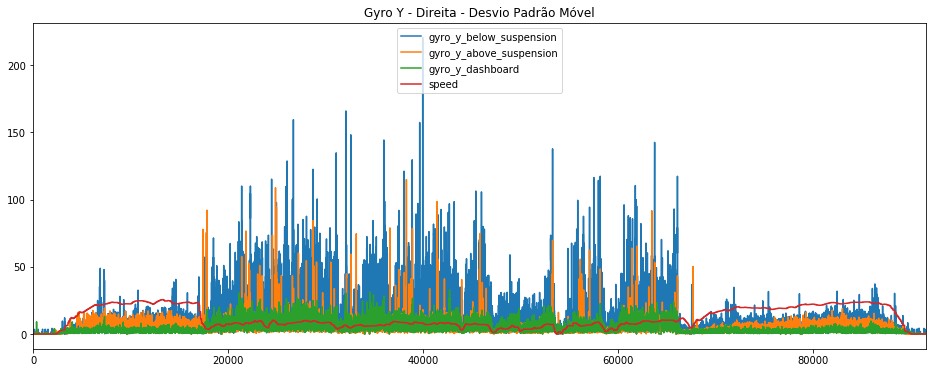

In [39]:
plotData(data_direita, "gyro_y", "Gyro Y - Direita - Desvio Padrão Móvel", std=True)

<h6>Gyro Z Esquerda</h6>

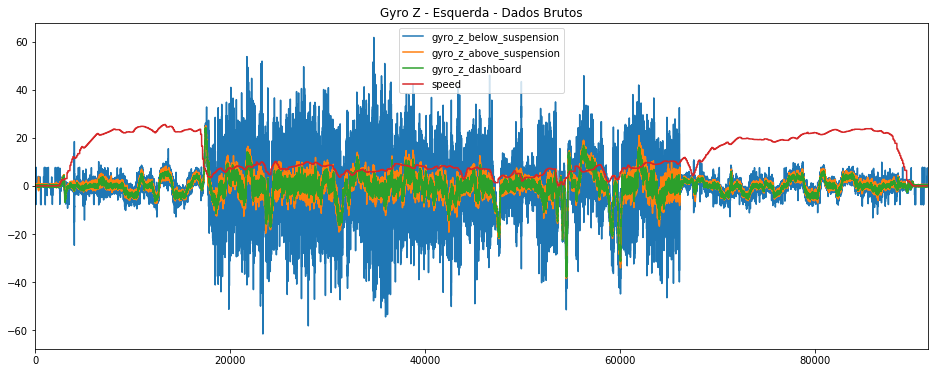

In [40]:
plotData(data_esquerda, "gyro_z", "Gyro Z - Esquerda - Dados Brutos", raw=True)

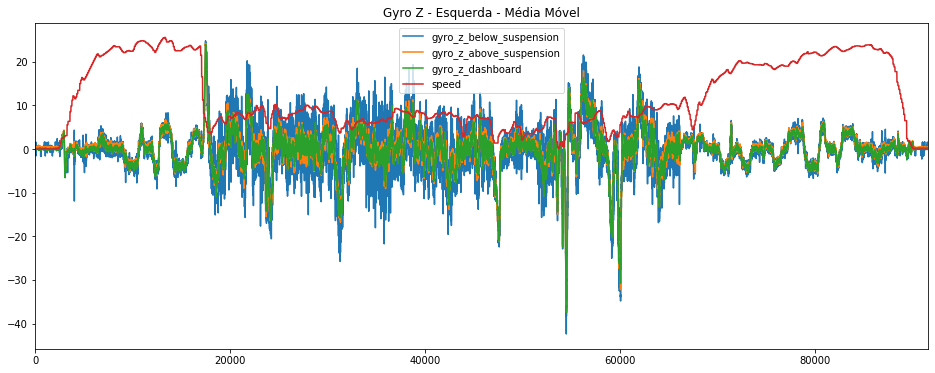

In [41]:
plotData(data_esquerda, "gyro_z", "Gyro Z - Esquerda - Média Móvel", mean=True)

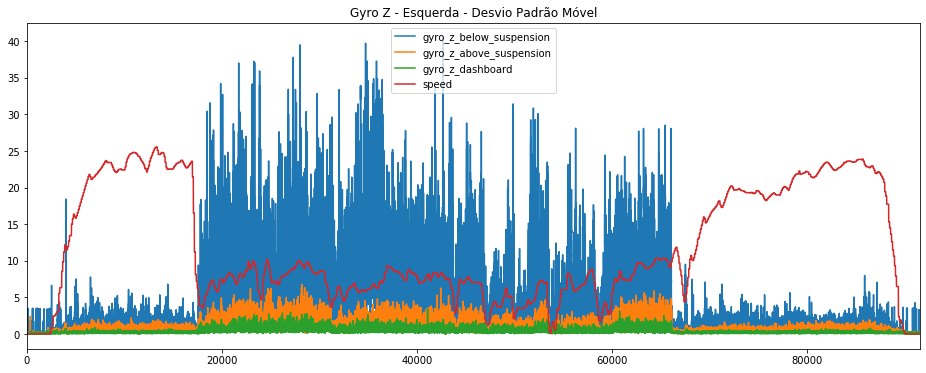

In [42]:
plotData(data_esquerda, "gyro_z", "Gyro Z - Esquerda - Desvio Padrão Móvel", std=True)

<h6>Gyro Z Direita</h6>

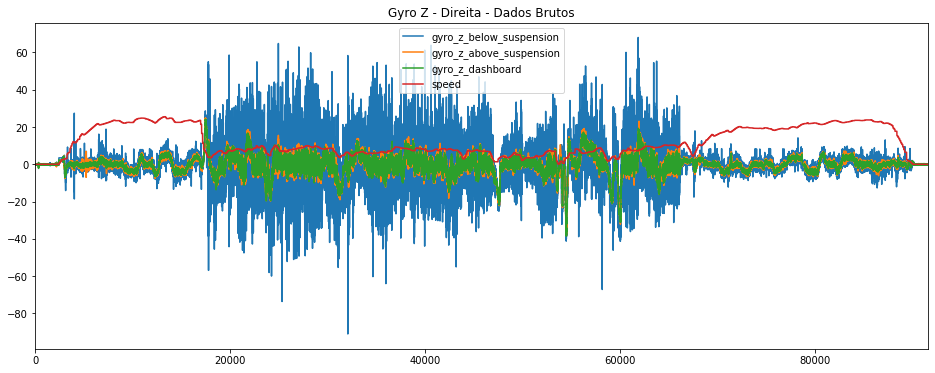

In [43]:
plotData(data_direita, "gyro_z", "Gyro Z - Direita - Dados Brutos", raw=True)

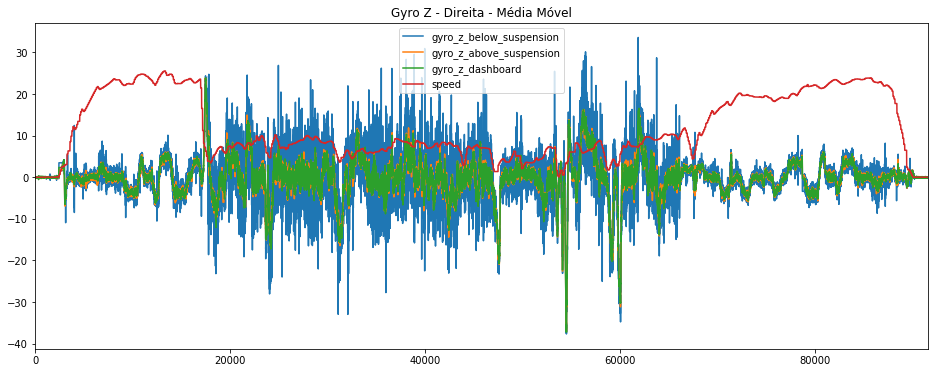

In [44]:
plotData(data_direita, "gyro_z", "Gyro Z - Direita - Média Móvel", mean=True)

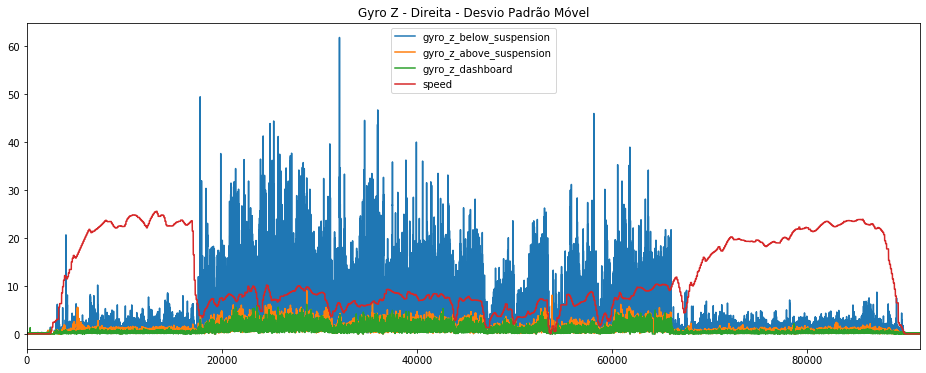

In [45]:
plotData(data_direita, "gyro_z", "Gyro Z - Direita - Desvio Padrão Móvel", std=True)

<h2>GPS</h2>

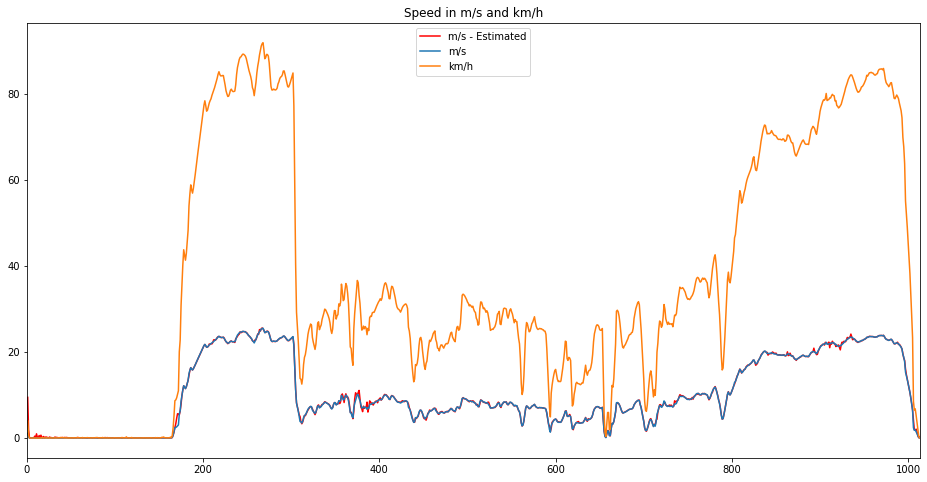

In [46]:
speedMS = gps['speed_meters_per_second']
speedKMH = gps['speed_meters_per_second'] * 3.6
speedEstimated = gps['distance_meters'] / gps['elapsed_time_seconds']

plt.figure(figsize=(16,8)) 
plt.title('Speed in m/s and km/h')
speedEstimated.plot(label='m/s - Estimated', color='red')
speedMS.plot(label='m/s')
speedKMH.plot(label='km/h')
plt.legend(loc='upper center')

In [47]:
locations = gps[['latitude', 'longitude']]
coordinates = [tuple(x) for x in locations.to_numpy()]

focolat = (gps['latitude'].min() + gps['latitude'].max()) / 2
focolon = (gps['longitude'].min() + gps['longitude'].max()) / 2
maps = folium.Map(location=[focolat, focolon], zoom_start=14)

folium.PolyLine(coordinates, color="blue", weight=2.5, opacity=1).add_to(maps)

maps